# BH-PCMLAI Practical Assignment01 - Dan Trezise

# Overview

Explore the coupons dataset and discover the relationships between types of coupons were accepted and by whom. Several scenerios will be explored and visualized. From these exercises I will be able to identify useful trends.


# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Read Data


In [3]:
data = pd.read_csv('data/coupons.csv')

# DATA REVIEW

Looking at the the dataframe to identify any issues with the data using:


In [4]:
# quick look at the data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# looking at the dataframe stats
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Identify any columns with null information
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

# DATA CLEANING

Data issues:
1. The "car" column has too many NaN values to be useful. The strategy is to delete the column from the dataframe.
2. The "direction_opp" column is redundant as the "direction_same" has the same data. Drop this column as well.

3. Several other columns have a few NaN values but not enough to be too concerned about, so the strategy is to drop the rows with NaN values.

In [7]:
#delete the car and direction_opp columns then confirm that it is gone from the list of columns

del data['car'] 
del data['direction_opp']
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
Y                         0
dtype: int64

In [8]:
# Use dropna to drop the rows with null information

data=data.dropna()

In [9]:
# confirm that each row has the same number of entries and all NaNs are gone

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

In [10]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y'],
      dtype='object')

In [11]:
# Remaming Columns to more useful names

old_names = [
    'destination',
    'temperature',
    'expiration',
    'gender',
    'has_children',
    'CoffeeHouse',
    'CarryAway',
    'RestaurantLessThan20',
    'Restaurant20To50',
    'toCoupon_GEQ5min',
    'toCoupon_GEQ15min',
    'toCoupon_GEQ25min',
    'direction_same',
    'Y'
] 
new_names = [
    'dest',
    'temp',
    'expires',
    'sex',
    'children',
    'Coffee',
    'Takeout',
    'Cheap',
    'Expensive',
    '5 min Drive',
    '15 min Drive',
    '25 min Drive',
    'same direction',
    'Accepted'
]

data.rename(columns=dict(zip(old_names, new_names)), inplace=True)
data

,dest,passanger,weather,temp,time,coupon,expires,sex,age,maritalStatus,...,Bar,Coffee,Takeout,Cheap,Expensive,5 min Drive,15 min Drive,25 min Drive,same direction,Accepted
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,0,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,0,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,0,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,1,1,0,0,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,1,0,0


In [12]:
data.columns

Index(['dest', 'passanger', 'weather', 'temp', 'time', 'coupon', 'expires',
       'sex', 'age', 'maritalStatus', 'children', 'education', 'occupation',
       'income', 'Bar', 'Coffee', 'Takeout', 'Cheap', 'Expensive',
       '5 min Drive', '15 min Drive', '25 min Drive', 'same direction',
       'Accepted'],
      dtype='object')

In [13]:
data['5 min Drive'].unique()

array([1], dtype=int64)

In [14]:
# Remane individual values to more useable names

data['dest'] = data['dest']\
    .str.replace('No Urgent Place', 'No Rush')

data['passanger'] = data['passanger']\
    .str.replace('Friend(s)', 'Friend')\
    .str.replace('Kid(s)', 'Child')

data['time'] = data['time']\
    .str.replace('7AM', '7')\
    .str.replace('10AM', '10')\
    .str.replace('2PM', '14')\
    .str.replace('6PM', '18')\
    .str.replace('10PM', '22')

data['coupon'] = data['coupon']\
    .str.replace('Restaurant(<20)', 'Cheap Restaurant')\
    .str.replace('Carry out & Take away', 'Carry Out')\
    .str.replace('Restaurant(20-50)', 'Expensive Restaurant')

data['expires'] = data['expires']\
    .str.replace('1d', '24 hours')\
    .str.replace('2h', '2 hours')

data['age'] = data['age']\
    .str.replace('50plus', '50')\
    .str.replace('below21', '20')

data['maritalStatus'] = data['maritalStatus']\
    .str.replace('Married partner', 'Married')\
    .str.replace('Unmarried partner', 'Partner')

data['education'] = data['education']\
    .str.replace('Bachelors degree', 'Bachelors')\
    .str.replace('Associates degree', 'Associates')\
    .str.replace('High School Graduate', 'High School')\
    .str.replace('Graduate degree (Masters or Doctorate)', 'Masters')\
    .str.replace('Some college - no degree', 'College Dropout')\
    .str.replace('Some High School', 'HS Dropout')

data['income'] = data['income']\
    .str.replace('Less than $12500', '$12000')\
    .str.replace('$100000 or More', '$100000')

data['Bar'] = data['Bar']\
    .str.replace('never', '0')\
    .str.replace('less1', '1')\
    .str.replace('1~3', '3')\
    .str.replace('4~8', '6')\
    .str.replace('gt8', '9')

data['Coffee'] = data['Coffee']\
    .str.replace('never', '0')\
    .str.replace('less1', '1')\
    .str.replace('1~3', '3')\
    .str.replace('4~8', '6')\
    .str.replace('gt8', '9')

data['Takeout'] = data['Takeout']\
    .str.replace('never', '0')\
    .str.replace('less1', '1')\
    .str.replace('1~3', '3')\
    .str.replace('4~8', '6')\
    .str.replace('gt8', '9')

data['Cheap'] = data['Cheap']\
    .str.replace('never', '0')\
    .str.replace('less1', '1')\
    .str.replace('1~3', '3')\
    .str.replace('4~8', '6')\
    .str.replace('gt8', '9')

data['Expensive'] = data['Expensive']\
    .str.replace('never', '0')\
    .str.replace('less1', '1')\
    .str.replace('1~3', '3')\
    .str.replace('4~8', '6')\
    .str.replace('gt8', '9')


data

,dest,passanger,weather,temp,time,coupon,expires,sex,age,maritalStatus,...,Bar,Coffee,Takeout,Cheap,Expensive,5 min Drive,15 min Drive,25 min Drive,same direction,Accepted
22,No Rush,Alone,Sunny,55,14,Cheap Restaurant,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,1
23,No Rush,Friend,Sunny,80,10,Coffee House,2 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,0
24,No Rush,Friend,Sunny,80,10,Bar,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,1
25,No Rush,Friend,Sunny,80,10,Carry Out,2 hours,Male,21,Single,...,0,1,6,6,1,1,1,0,0,0
26,No Rush,Friend,Sunny,80,14,Coffee House,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,18,Carry Out,24 hours,Male,26,Single,...,0,0,3,6,3,1,0,0,1,1
12680,Work,Alone,Rainy,55,7,Carry Out,24 hours,Male,26,Single,...,0,0,3,6,3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7,Coffee House,24 hours,Male,26,Single,...,0,0,3,6,3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7,Bar,24 hours,Male,26,Single,...,0,0,3,6,3,1,1,1,0,0


# What proportion of the total observations chose to accept the coupon? 

In [15]:
# what proportion accepted the coupon

accepted = data["Accepted"].value_counts(normalize=True)

# data.shape

print("The proportion of total observations that ", accepted)


The proportion of total observations that  Accepted
1    0.569335
0    0.430665
Name: proportion, dtype: float64


#  bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Total Coupons Accepted by Category'}, xlabel='coupon', ylabel='count'>

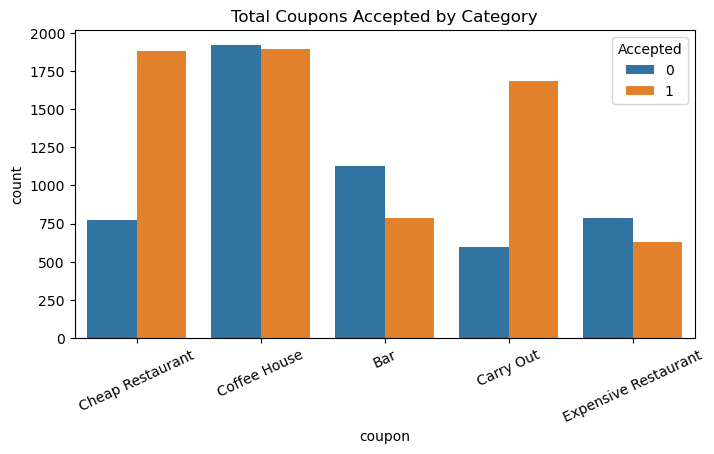

In [16]:
# Bar Plot Using Seaborn
plt.figure(figsize=(8, 4))
plt.xticks(rotation = 25)
plt.title('Total Coupons Accepted by Category')
plt.xlabel('Type of Coupon')
plt.ylabel('Number of Coupons')
sns.countplot(data = data, x = 'coupon', hue = "Accepted")

# plt.savefig('plots/CouponsAccepted.png')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Number of Coupons')

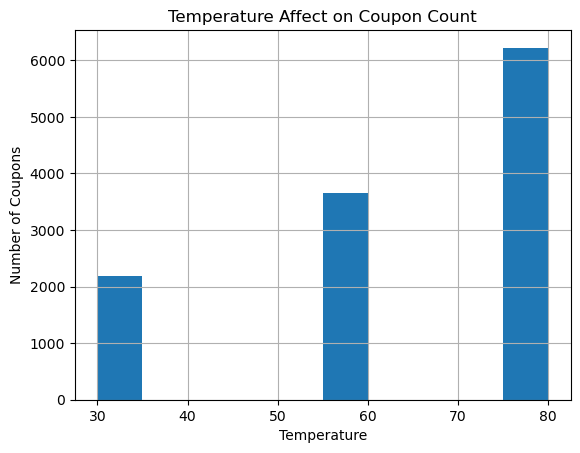

In [17]:
# Histogram of Tempature

hist = data['temp'].hist()
plt.title('Temperature Affect on Coupon Count')
plt.xlabel('Temperature')
plt.ylabel('Number of Coupons')
# plt.savefig('plots/TempAffect.png')

# **Investigating the Bar Coupons**

In [18]:
# Creating a new data frame that contains just the bar coupons
df_bar = data['Bar'].sort_values()

In [19]:
# Showing info and a bar graph to visualize the new dataframe
df_bar.info(), df_bar.describe()


<class 'pandas.core.series.Series'>
Index: 12079 entries, 22 to 7788
Series name: Bar
Non-Null Count  Dtype 
--------------  ----- 
12079 non-null  object
dtypes: object(1)
memory usage: 188.7+ KB


(None,
 count     12079
 unique        5
 top           0
 freq       4934
 Name: Bar, dtype: object)

Text(0, 0.5, 'Count')

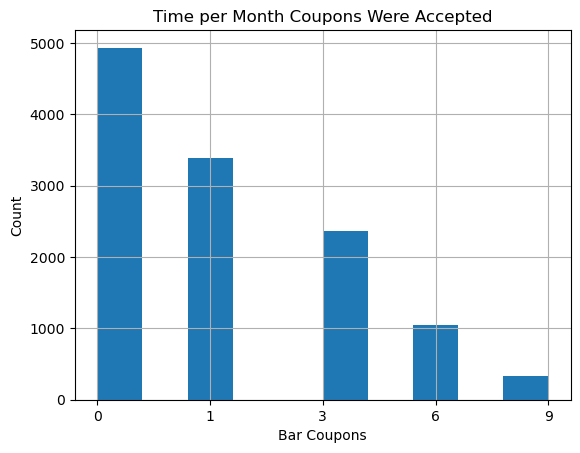

In [20]:
# bar graph to visualize the new dataframe
df_bar.hist()
plt.title('Time per Month Coupons Were Accepted')
plt.xlabel('Bar Coupons')
plt.ylabel('Count')
# plt.savefig('plots/TimesPerMonthAccepted.png')

# What proportion of bar coupons were accepted?


In [21]:
# what are the total proportions the bar column
bar_proportions = df_bar.value_counts(normalize=True)
bar_proportions

Bar
0    0.408478
1    0.280984
3    0.196208
6    0.087259
9    0.027072
Name: proportion, dtype: float64

In [22]:
# The total accepted coupons for the bar are the total less the "0" column proportion:

bar_total_accepted = 1 - 0.408478

print("The proportion of total observations that ", bar_total_accepted)

The proportion of total observations that  0.591522


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
# The acceptance rate of those that went to the bar less that 3 times is the sum of the data for "less than 3" and "less than One"

Three_or_less = 0.280984 + 0.196208
Three_or_less

0.477192

In [24]:
more_than_three = bar_total_accepted - Three_or_less
more_than_three

0.11432999999999999

In [25]:
# Calculating the ratio of less Than vs More Than three times a month.

import math
x = int(Three_or_less * 10)
y = int(more_than_three * 10)

div = math.gcd(x, y)

print('The ratio of coupons accepted less than 3 times a month to more than three times a month is roughly  ' f"{x/div} to {y/div}")
print('(0.477192 to 0.114329 to be exact)')

The ratio of coupons accepted less than 3 times a month to more than three times a month is roughly  4.0 to 1.0
(0.477192 to 0.114329 to be exact)


# "Adults Visiting Bars More Than Once A Month"

In [26]:
data.columns

Index(['dest', 'passanger', 'weather', 'temp', 'time', 'coupon', 'expires',
       'sex', 'age', 'maritalStatus', 'children', 'education', 'occupation',
       'income', 'Bar', 'Coffee', 'Takeout', 'Cheap', 'Expensive',
       '5 min Drive', '15 min Drive', '25 min Drive', 'same direction',
       'Accepted'],
      dtype='object')

In [27]:
# Creating a new data frame that contains just the bar coupons
df_bar_age = data[['passanger', 'occupation', 'Bar', 'age', 'Accepted']]
df_bar_age

,passanger,occupation,Bar,age,Accepted
22,Alone,Architecture & Engineering,0,21,1
23,Friend,Architecture & Engineering,0,21,0
24,Friend,Architecture & Engineering,0,21,1
25,Friend,Architecture & Engineering,0,21,0
26,Friend,Architecture & Engineering,0,21,0
...,...,...,...,...,...
12679,Partner,Sales & Related,0,26,1
12680,Alone,Sales & Related,0,26,1
12681,Alone,Sales & Related,0,26,0
12682,Alone,Sales & Related,0,26,0


In [28]:
df_bar_age['age'].unique()

array(['21', '46', '26', '31', '41', '50', '36', '20'], dtype=object)

In [29]:
df_bar_age['Bar'].unique()

array(['0', '1', '3', '9', '6'], dtype=object)

In [30]:
over25 = ['26', '31','36', '41', '46', '50']
more_than_once = ['3', '9', '6']

dq_bar_age = data.query("age in @over25 and Bar in @more_than_once")
dq_bar_age.sample(10)


,dest,passanger,weather,temp,time,coupon,expires,sex,age,maritalStatus,...,Bar,Coffee,Takeout,Cheap,Expensive,5 min Drive,15 min Drive,25 min Drive,same direction,Accepted
11274,Work,Alone,Snowy,30,7,Coffee House,24 hours,Male,31,Single,...,3,6,6,6,3,1,0,0,1,1
9239,Home,Partner,Sunny,30,22,Cheap Restaurant,24 hours,Male,50,Married,...,3,0,3,3,1,1,0,0,1,0
3076,No Rush,Friend,Sunny,80,14,Coffee House,24 hours,Male,26,Single,...,9,9,9,9,9,1,1,0,0,1
8765,No Rush,Friend,Snowy,30,10,Carry Out,24 hours,Female,50,Single,...,3,3,1,3,1,1,1,0,0,0
6577,Work,Alone,Sunny,80,7,Coffee House,2 hours,Female,41,Married,...,6,3,6,9,1,1,0,0,1,1
9843,Home,Alone,Sunny,80,18,Cheap Restaurant,24 hours,Female,50,Married,...,3,6,1,3,1,1,0,0,1,1
123,Home,Alone,Sunny,55,18,Bar,24 hours,Male,26,Partner,...,3,9,6,3,1,1,0,0,1,1
2602,Work,Alone,Sunny,55,7,Cheap Restaurant,24 hours,Male,50,Single,...,3,3,1,3,1,1,0,0,0,0
8412,No Rush,Friend,Sunny,30,22,Cheap Restaurant,2 hours,Male,26,Single,...,6,3,6,3,6,1,0,0,0,1
5973,Home,Alone,Sunny,80,18,Coffee House,24 hours,Male,36,Married,...,3,1,3,6,3,1,0,0,0,0


Text(0.5, 1.0, 'Adults Visiting Bars More Than Once A Month')

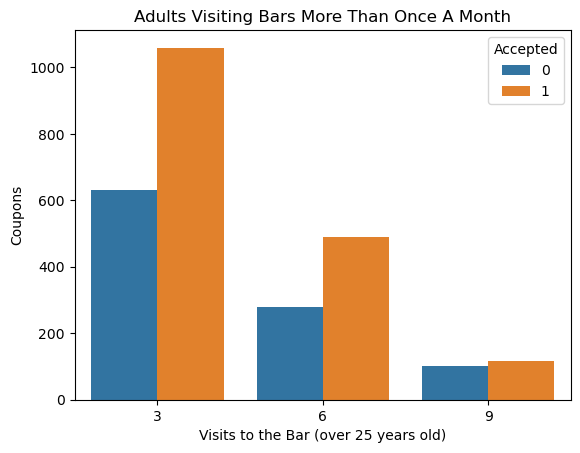

In [31]:
# Plot "Adults Visiting Bars More Than Once A Month"

sns.countplot(data=dq_bar_age.sort_values(by = 'Bar'), x='Bar', hue='Accepted')
plt.xlabel("Visits to the Bar (over 25 years old)")
plt.ylabel("Coupons")
plt.title("Adults Visiting Bars More Than Once A Month")
# plt.savefig('plots/AdultBar01.png')

Text(0.5, 1.0, 'Adults Visiting Bars More Than Once A Month')

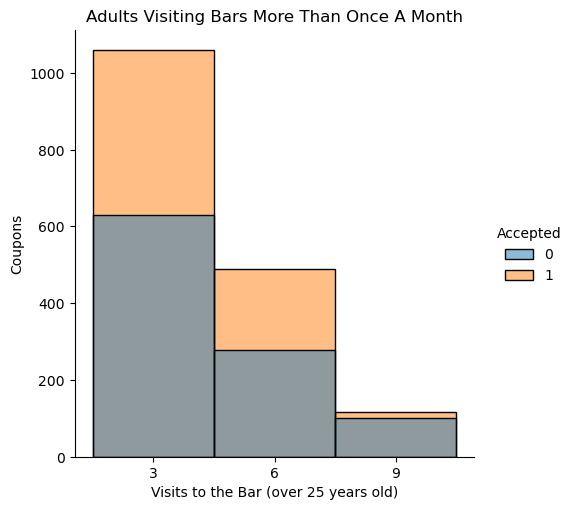

In [32]:
# Plot "Adults Visiting Bars More Than Once A Month"

sns.displot(dq_bar_age.sort_values(by = 'Bar'), x = 'Bar', hue = 'Accepted')
plt.xlabel("Visits to the Bar (over 25 years old)")
plt.ylabel("Coupons")
plt.title("Adults Visiting Bars More Than Once A Month")
# plt.savefig('plots/AdultBar02.png')

# "Non-Farming Adults Visiting Bars More Than Once A Month"

In [33]:
df_bar_age.columns

Index(['passanger', 'occupation', 'Bar', 'age', 'Accepted'], dtype='object')

In [34]:
df_bar_age['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [35]:
df_bar_age['passanger'].unique()

array(['Alone', 'Friend', 'Child', 'Partner'], dtype=object)

In [36]:

more_than_once = ['3', '9', '6']
not_a_child = ['Friend', 'Partner']

# data query x3:  more than once | not a farmer | not a child:

dq_notFarmers = data.query("occupation != 'Farming Fishing & Forestry' and Bar in @more_than_once and passanger in @not_a_child")
dq_notFarmers.sample(10)


,dest,passanger,weather,temp,time,coupon,expires,sex,age,maritalStatus,...,Bar,Coffee,Takeout,Cheap,Expensive,5 min Drive,15 min Drive,25 min Drive,same direction,Accepted
9836,No Rush,Friend,Sunny,30,22,Carry Out,24 hours,Female,50,Married,...,3,6,1,3,1,1,1,0,0,0
6238,No Rush,Friend,Sunny,80,14,Cheap Restaurant,2 hours,Male,41,Divorced,...,6,6,3,3,1,1,1,0,0,1
10921,Home,Partner,Rainy,55,18,Carry Out,24 hours,Female,21,Partner,...,3,3,6,3,1,1,0,0,1,1
10342,No Rush,Friend,Sunny,30,22,Carry Out,24 hours,Male,21,Single,...,3,6,1,0,0,1,1,0,0,1
6096,No Rush,Friend,Sunny,55,14,Coffee House,24 hours,Male,21,Partner,...,3,1,3,3,0,1,0,0,0,0
1178,No Rush,Friend,Sunny,55,14,Carry Out,24 hours,Male,26,Married,...,3,9,6,9,6,1,1,0,0,0
1772,No Rush,Partner,Sunny,80,10,Coffee House,2 hours,Male,21,Partner,...,6,3,6,6,3,1,0,0,0,0
6124,No Rush,Partner,Sunny,80,18,Bar,2 hours,Male,26,Married,...,3,0,3,3,1,1,1,0,0,0
7312,No Rush,Friend,Sunny,30,22,Cheap Restaurant,2 hours,Female,26,Single,...,9,1,3,3,3,1,0,0,0,0
8701,No Rush,Partner,Sunny,80,22,Cheap Restaurant,24 hours,Male,31,Married,...,3,6,1,6,1,1,1,0,0,0


Text(0.5, 1.0, 'Non-Farming Adults Visiting Bars More Than Once A Month')

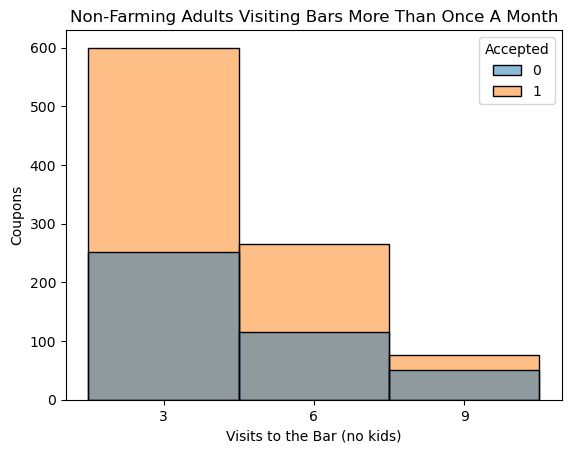

In [37]:
# "Non-Farming Adults Visiting Bars More Than Once A Month"

sns.histplot(data=dq_notFarmers.sort_values(by = 'Bar'), x='Bar', hue='Accepted')
plt.xlabel("Visits to the Bar (no kids)")
plt.ylabel("Coupons")
plt.title("Non-Farming Adults Visiting Bars More Than Once A Month")
# plt.savefig('plots/NoFarmers.png')

Based on this graph, those in non farming workers without kids have a high acceptance rate for coupons to the bar. The rate dwindles but still follows the trend of number of visits to the bar per month. Coupons targeting this demographic and location appear to be successful.

# "Married Status Affect on Acceptance"

In [38]:
data.head()

,dest,passanger,weather,temp,time,coupon,expires,sex,age,maritalStatus,...,Bar,Coffee,Takeout,Cheap,Expensive,5 min Drive,15 min Drive,25 min Drive,same direction,Accepted
22,No Rush,Alone,Sunny,55,14,Cheap Restaurant,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,1
23,No Rush,Friend,Sunny,80,10,Coffee House,2 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,0
24,No Rush,Friend,Sunny,80,10,Bar,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,1
25,No Rush,Friend,Sunny,80,10,Carry Out,2 hours,Male,21,Single,...,0,1,6,6,1,1,1,0,0,0
26,No Rush,Friend,Sunny,80,14,Coffee House,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,0


In [39]:
data['passanger'].unique()

array(['Alone', 'Friend', 'Child', 'Partner'], dtype=object)

In [40]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

more_than_once = ['3', '9', '6']
not_a_child = ['Friend', 'Partner']

# data query x3:  more than once | not a widow | not a child:

data_q = data.query("Bar in @more_than_once and maritalStatus != 'Widowed' and passanger in @not_a_child")
data_q.sample(10)


,dest,passanger,weather,temp,time,coupon,expires,sex,age,maritalStatus,...,Bar,Coffee,Takeout,Cheap,Expensive,5 min Drive,15 min Drive,25 min Drive,same direction,Accepted
11497,No Rush,Friend,Sunny,80,18,Cheap Restaurant,2 hours,Female,20,Single,...,9,3,1,6,9,1,0,0,0,1
2184,No Rush,Friend,Sunny,80,10,Coffee House,2 hours,Male,21,Single,...,3,1,3,3,1,1,0,0,0,1
11441,No Rush,Partner,Snowy,30,10,Cheap Restaurant,24 hours,Male,31,Married,...,3,3,6,6,6,1,0,0,0,1
8194,No Rush,Friend,Sunny,80,14,Expensive Restaurant,2 hours,Male,31,Single,...,3,6,3,3,1,1,1,0,0,1
6921,No Rush,Partner,Snowy,30,14,Coffee House,2 hours,Male,31,Partner,...,9,3,3,6,1,1,1,0,0,1
4309,No Rush,Friend,Sunny,55,14,Coffee House,24 hours,Female,46,Single,...,3,0,6,3,3,1,0,0,0,1
5396,No Rush,Partner,Sunny,80,10,Coffee House,24 hours,Female,26,Partner,...,3,3,3,3,3,1,0,0,0,1
10853,No Rush,Friend,Sunny,30,10,Carry Out,2 hours,Male,41,Single,...,3,6,3,6,6,1,0,0,0,1
248,No Rush,Friend,Sunny,55,14,Carry Out,24 hours,Female,21,Single,...,3,0,6,3,1,1,1,0,0,1
574,No Rush,Friend,Sunny,80,14,Cheap Restaurant,24 hours,Male,31,Single,...,6,9,9,3,1,1,1,0,0,1


Text(0.5, 1.0, 'Married Status Affect on Acceptance')

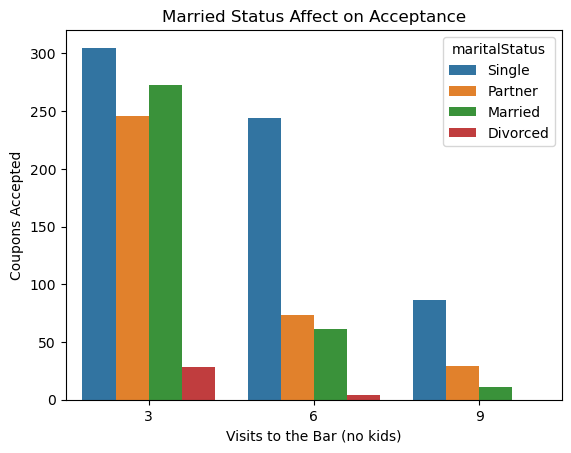

In [41]:
# Plot "Married Status Affect on Acceptance"

sns.countplot(data=data_q.sort_values(by = 'Bar'), x='Bar', hue='maritalStatus')
plt.xlabel("Visits to the Bar (no kids)")
plt.ylabel("Coupons Accepted")
plt.title("Married Status Affect on Acceptance")
# plt.savefig('plots/MarriedStatus.png')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, single drivers without kids are more likely to visit the Bar more than once a month than any other group. Interestingly, divorced drivers very infrequently visit the bar more than once a month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# "Weather Affect on Coffee Houses"

In [42]:
data.head()

,dest,passanger,weather,temp,time,coupon,expires,sex,age,maritalStatus,...,Bar,Coffee,Takeout,Cheap,Expensive,5 min Drive,15 min Drive,25 min Drive,same direction,Accepted
22,No Rush,Alone,Sunny,55,14,Cheap Restaurant,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,1
23,No Rush,Friend,Sunny,80,10,Coffee House,2 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,0
24,No Rush,Friend,Sunny,80,10,Bar,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,1
25,No Rush,Friend,Sunny,80,10,Carry Out,2 hours,Male,21,Single,...,0,1,6,6,1,1,1,0,0,0
26,No Rush,Friend,Sunny,80,14,Coffee House,24 hours,Male,21,Single,...,0,1,6,6,1,1,0,0,0,0


In [43]:
data['weather'].unique

<bound method Series.unique of 22       Sunny
23       Sunny
24       Sunny
25       Sunny
26       Sunny
         ...  
12679    Rainy
12680    Rainy
12681    Snowy
12682    Snowy
12683    Sunny
Name: weather, Length: 12079, dtype: object>

In [44]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

at_least_once = ['1','3', '9', '6']
not_a_child = ['Alone', 'Friend', 'Partner']

# data query x3:  at least once| not a widow | not a child:

dq_cafe = data.query("Coffee in @at_least_once and weather != 'Snowy' and passanger in @not_a_child")
dq_cafe.sample(10)


,dest,passanger,weather,temp,time,coupon,expires,sex,age,maritalStatus,...,Bar,Coffee,Takeout,Cheap,Expensive,5 min Drive,15 min Drive,25 min Drive,same direction,Accepted
645,No Rush,Alone,Sunny,55,10,Coffee House,2 hours,Female,41,Single,...,1,3,3,3,0,1,0,0,0,1
2566,No Rush,Friend,Sunny,55,14,Carry Out,24 hours,Female,50,Married,...,0,1,9,6,1,1,1,0,0,0
11921,Home,Alone,Sunny,30,18,Carry Out,24 hours,Female,20,Single,...,0,1,3,3,3,1,0,0,0,1
6874,Home,Alone,Sunny,55,18,Bar,2 hours,Female,50,Single,...,0,6,3,3,0,1,1,0,1,0
8368,No Rush,Alone,Sunny,55,18,Coffee House,2 hours,Female,50,Married,...,1,6,6,9,1,1,0,0,0,0
11524,No Rush,Alone,Rainy,55,10,Bar,24 hours,Male,20,Single,...,0,9,9,9,1,1,1,0,0,0
25,No Rush,Friend,Sunny,80,10,Carry Out,2 hours,Male,21,Single,...,0,1,6,6,1,1,1,0,0,0
3318,No Rush,Friend,Sunny,80,10,Carry Out,2 hours,Male,36,Married,...,1,6,3,3,1,1,1,0,0,0
12242,No Rush,Friend,Sunny,30,10,Carry Out,2 hours,Male,50,Married,...,1,3,6,3,3,1,0,0,0,1
7410,Home,Partner,Sunny,30,22,Carry Out,2 hours,Male,46,Married,...,1,3,3,1,3,1,1,0,0,1


Text(0.5, 1.0, 'Weather Affect on Coffee Houses')

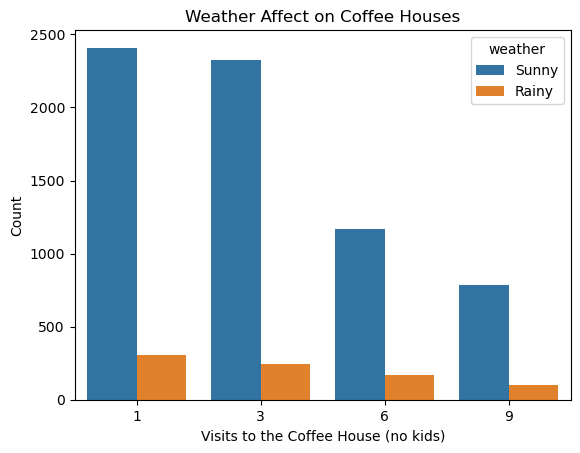

In [45]:
# Plot "Weather Affect on Coffee Houses"

sns.countplot(data=dq_cafe.sort_values(by = 'Coffee'), x='Coffee', hue='weather')
plt.xlabel("Visits to the Coffee House (no kids)")
plt.ylabel("Count")
plt.title("Weather Affect on Coffee Houses")
# plt.savefig('plots/CoffeHouseWeather.png')

# Conclusion
From the various observations it can be concluded that drivers will accept coupons for some destinations. It appears there are several determining features that can predict the acceptance rate.

# Next Steps
- Further investigation of the data to identify the best features for predicting the acceptance rate for each destination and/or target demographic

- Begin modeling with the data to find the best model for predicting coupon acceptance.

- Pass the results on to marketing teams to apply the findings to attrack more customers.
